## Verileri Al

Evrişimli sinir ağları görüntülerle çok iyi çalıştığından, onlar hakkında daha fazla bilgi edinmek için bir görüntü veri kümesiyle başlayacağız.

Çalışacağımız görseller, yemek yemeklerinin gerçek dünyadan 101.000 görselinden oluşan 101 farklı kategoriden oluşan bir koleksiyon olan [Food-101](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/) veri setinden alınmıştır.

Başlamak için, kategorilerden sadece ikisini kullanacağız, pizza steak ve biftek 🥩 ve ikili bir sınıflandırıcı oluşturacağız.

> 🔑 Not: Kullandığımız verileri hazırlamak için görüntüleri farklı alt küme klasörlerine taşıma gibi ön işleme adımları yapılmıştır. Bu ön işleme adımlarını görmek için ön işleme not defterine bakın.

Pizza_steak alt kümesi .zip dosyasını indireceğiz ve sıkıştırmasını açacağız.

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-06-19 08:33:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   106MB/s    in 1.0s    

2021-06-19 08:33:11 (106 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



> Not: Google Colab kullanıyorsanız ve çalışma zamanınızın bağlantısı kesilirse, dosyaları yeniden indirmeniz gerekebilir. Bunu, yukarıdaki hücreyi yeniden çalıştırarak yapabilirsiniz.

## Verileri inceleyin

Herhangi bir makine öğrenimi projesinin başlangıcında çok önemli bir adım, verilerle bir olmaktır. Bu genellikle, üzerinde çalıştığınız verileri anlamak için bol miktarda görselleştirme ve klasör taraması anlamına gelir.

Bunu söylerken, az önce indirdiğimiz verileri inceleyelim.

Dosya yapısı, resimlerle çalışmak için kullanabileceğiniz tipik bir biçimde biçimlendirilmiştir.

Daha spesifik olarak:

- Eğitim veri kümesindeki tüm görüntüleri içeren ve her biri o sınıfın görüntülerini içeren belirli bir sınıftan sonra adlandırılan alt dizinleri içeren bir train dizini.
- Train dizini ile aynı yapıya sahip bir test dizini.

```
pizza_steak <- top level folder
└───train <- training images
│   └───pizza
│   │   │   1008104.jpg
│   │   │   1638227.jpg
│   │   │   ...      
│   └───steak
│       │   1000205.jpg
│       │   1647351.jpg
│       │   ...
│   
└───test <- testing images
│   └───pizza
│   │   │   1001116.jpg
│   │   │   1507019.jpg
│   │   │   ...      
│   └───steak
│       │   100274.jpg
│       │   1653815.jpg
│       │   ...    
```

İndirdiğimiz dizinlerin her birini inceleyelim.

Bunu yapmak için, liste anlamına gelen ls komutunu kullanabiliriz.

In [2]:
!ls pizza_steak

test  train


Bir tren ve test klasörümüz olduğunu görebiliriz.

Bakalım içlerinden birinin içinde ne varmış.

In [3]:
!ls pizza_steak/train/

pizza  steak


ya `steak` dizisi nasıl?

In [4]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

Maşallah, bir sürü görüntü var. Ama bunların sayısı ne?

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [7]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


Pekala, elimizde 750 eğitim görseli ve 250 adet pizza ve biftek görseli içeren bir koleksiyonumuz var.

Bazılarına bakalım.

> 🤔 Not: Verilerle çalışırken, mümkün olduğunca görselleştirmek her zaman iyidir. Bir projenin ilk birkaç adımını verilerle bir bütün olarak ele alın. Görselleştirin, görselleştirin, görselleştirin.

In [8]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


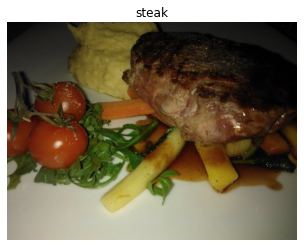

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

Farklı sınıflardan bir düzine kadar görüntüyü inceledikten sonra, neyle çalıştığımız hakkında bir fikir edinmeye başlayabilirsiniz.

Food101 veri setinin tamamı, 101 farklı sınıftan benzer görüntülerden oluşuyor.

Görüntü şeklini, çizilen görüntünün yanına yazdırdığımızı fark etmiş olabilirsiniz.

Bunun nedeni, bilgisayarımızın görüntüyü görme biçiminin büyük bir dizi (tensör) biçiminde olmasıdır.

In [10]:
# View the img (actually just a big array/tensor)
img

array([[[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  1,   1,   1],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [  3,   3,   3],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[163, 157, 141],
        [163, 157, 141],
        [164, 158, 142],
        ...,
        [ 86,  88,  66],
        [ 86,  88,  66],
        [ 86,  88,  66]],

       [[163, 157, 141],
        [163, 157, 141],
        [164, 158, 142],
        ...,
        [ 86,  88,  66],
        [ 85,  87,  65],
        [ 85,  87,  65]],

       [[163, 157, 141],
        [164, 158, 142],
        [164, 158, 142],
        ...,
        [ 85,  87,  65],
        [ 85,  87,  65],
        [ 84,  86,  64]]

In [11]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

Görüntü şekline daha yakından baktığınızda, formda olduğunu göreceksiniz (Genişlik, Yükseklik, Renk Kanalları).

Bizim durumumuzda genişlik ve yükseklik değişkendir ancak renkli görüntülerle uğraştığımız için renk kanalları değeri her zaman 3'tür. Bu, farklı kırmızı, yeşil ve mavi (RGB) piksel değerleri içindir.

img dizisindeki tüm değerlerin 0 ile 255 arasında olduğunu fark edeceksiniz. Bunun nedeni, kırmızı, yeşil ve mavi değerlerin olası aralığının bu olmasıdır.

Örneğin, kırmızı=0, yeşil=0, mavi=255 değerine sahip bir piksel çok mavi görünecektir.

Bu nedenle, pizza ve biftek resimlerimizi birbirinden ayırt etmek için bir model oluşturduğumuzda, her bir sınıfın nasıl göründüğünü belirleyen bu farklı piksel değerlerinde desenler bulmak olacaktır.

> 🔑 Not: Daha önce tartıştığımız gibi, sinir ağları dahil birçok makine öğrenimi modeli, birlikte çalıştıkları değerlerin 0 ile 1 arasında olmasını tercih eder. Bunu bilerek, görüntülerle çalışmak için en yaygın ön işleme adımlarından biri ölçeklendirmektir (ayrıca görüntü dizilerini 255'e bölerek piksel değerlerini normalleştirme olarak adlandırılır.

In [12]:
# Get all the pixel values between 0 & 1
img/255. 

array([[[0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.63921569, 0.61568627, 0.55294118],
        [0.63921569, 0.61568627, 0.55294118],
        [0.64313725, 0

## Bir evrişimsel sinir ağının (tipik) mimarisi

Konvolüsyonel sinir ağları, birçok farklı şekilde oluşturulabilmeleri nedeniyle diğer derin öğrenme sinir ağlarından farklı değildir. Aşağıda gördükleriniz, geleneksel bir CNN'de bulmayı umduğunuz bazı bileşenlerdir.

Evrişimli bir sinir ağının bileşenleri:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |


![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)

## Uçtan uca bir örnek

Verilerimizi inceledik ve sınıf başına 750 eğitim resminin yanı sıra 250 test resmi olduğunu ve hepsinin farklı şekillerde olduğunu gördük.

Doğrudan derinlere atlamanın zamanı geldi.

Orijinal veri seti yazarlarının makalesini okuduğumuzda, bir Random Forest makine öğrenme modeli kullandıklarını ve içlerinde hangi farklı yiyeceklerin farklı görüntülere sahip olduğunu tahmin etmede ortalama %50,76 doğruluk elde ettiklerini görüyoruz.

Şu andan itibaren, bu %50,76 bizim temelimiz olacak.

> 🔑 Not: Temel, denemek ve geçmek istediğiniz bir puan veya değerlendirme metriğidir. Genellikle basit bir modelle başlayacak, bir temel oluşturacak ve modelin karmaşıklığını artırarak onu yenmeye çalışacaksınız. Makine öğrenimini öğrenmenin gerçekten eğlenceli bir yolu, sonuçları yayınlanmış bir tür modelleme kağıdı bulmak ve onu yenmeye çalışmaktır.

Aşağıdaki hücredeki kod, pizza_steak veri setimizi yukarıda listelenen bileşenleri kullanarak bir evrişimsel sinir ağı (CNN) ile modellemek için uçtan uca bir şekilde çoğalır.

Tanıyamayacağınız bir sürü şey olacak, ancak kodu kendiniz adım atın ve ne yaptığını çözüp çözemeyeceğinize bakın.

Adımların her birini daha sonra not defterinde inceleyeceğiz.

Referans olarak, kullandığımız model, CNN açıklayıcı web sayfasını besleyen bilgisayarlı görü mimarisi olan TinyVGG'yi kopyalar.

> 📖 Kaynak: Aşağıda kullandığımız mimari, 2014 ImageNet sınıflandırma yarışmasında 2. olan evrişimli bir sinir ağı olan VGG-16'nın küçültülmüş bir versiyonudur.

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 199ms/step - loss: 0.5804 - accuracy: 0.6793 - val_loss: 0.4205 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4159 - accuracy: 0.8040 - val_loss: 0.3530 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4078 - accuracy: 0.8133 - val_loss: 0.3354 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3551 - accuracy: 0.8520 - val_loss: 0.3158 - val_accuracy: 0.8720
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3415 - accuracy: 0.8580 - val_loss: 0.3666 - val_accuracy: 0.8520


> 🤔 Not: Yukarıdaki hücrenin çalışması dönem başına ~12 saniyeden uzun sürüyorsa GPU hızlandırıcı kullanmıyor olabilirsiniz. Colab dizüstü bilgisayar kullanıyorsanız, Çalışma Zamanı -> Çalışma Zamanı Türünü Değiştir -> Donanım Hızlandırıcı'ya gidip "GPU"yu seçerek bir GPU hızlandırıcıya erişebilirsiniz. Bunu yaptıktan sonra, çalışma zamanı türünü değiştirmek Colab'ın sıfırlanmasına neden olacağından yukarıdaki hücrelerin tümünü yeniden çalıştırmanız gerekebilir.

Güzel! 5 çağdan sonra modelimiz %50,76 doğruluk temel puanını geçti (modelimiz eğitim setinde ~%85 doğruluk ve test setinde ~%85 doğruluk elde etti).

Ancak, modelimiz Food101 veri setindeki 101 sınıfın tümü yerine yalnızca ikili sınıflandırma probleminden geçti, bu nedenle bu ölçümleri doğrudan karşılaştıramıyoruz. Bununla birlikte, şu ana kadarki sonuçlar modelimizin bir şeyler öğrendiğini gösteriyor.

> 🛠 Alıştırma: Yukarıdaki hücredeki ana kod bloklarının her birinin üzerinden geçin, her birinin ne yaptığını düşünüyorsunuz? Emin değilseniz sorun değil, bunu yakında halledeceğiz. Bu arada, inanılmaz [CNN açıklayıcı web](https://poloclub.github.io/cnn-explainer/) sitesinde 10 dakika oynayarak geçirin. Web sayfasının üst kısmındaki katman adları hakkında ne fark ediyorsunuz?

Halihazırda bir modele uyduğumuza göre, mimarisine bir göz atalım.

In [14]:
# Check out the layers in our model
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Model_1 katmanlarının adları ve CNN açıklayıcı web sitesinin en üstündeki katman adları hakkında ne fark ediyorsunuz?

Size küçük bir sır vereyim: Model demoları için kullandıkları mimariyi aynen kopyaladık.

Git bak! Vahşi doğada bulduğunuz modelleri çoğaltmaya başladınız bile.

Şimdi burada tartışmadığımız birkaç yeni şey var, yani:

- ImageDataGenerator sınıfı ve yeniden ölçeklendirme parametresi
- flow_from_directory() yöntemi
  - batch_size parametresi
  - target_size parametresi
- Conv2D katmanları (ve bunlarla birlikte gelen parametreler)
- MaxPool2D katmanları (ve parametreleri).
- fit() işlevindekistep_per_epoch ve validation_steps parametreleri

Bunların her birine dalmadan önce, daha önce üzerinde çalıştığımız bir modeli verilerimize uydurmaya çalışırsak ne olacağını görelim.

## Daha önce olduğu gibi aynı modeli kullanma

Sinir ağlarının birçok farklı soruna nasıl uyarlanabileceğini örneklemek için, daha önce oluşturduğumuz bir ikili sınıflandırma modelinin verilerimizle nasıl çalışabileceğini görelim.

> 🔑 Not: Önceki sınıflandırma defterini incelemediyseniz, sorun yok, TensorFlow Playground ortamından kopyalanan noktaları ayırmak için kullanılan 4 katmanlı basit bir mimari getireceğiz.

İki şeyi değiştirmek dışında önceki modelimizde aynı parametrelerin hepsini kullanabiliriz:

- Veriler - artık noktalar yerine resimlerle çalışıyoruz.
- Girdi şekli - sinir ağımıza üzerinde çalıştığımız görüntülerin şeklini söylemeliyiz.
  - Yaygın bir uygulama, görüntüleri tek bir boyuta yeniden şekillendirmektir. Bizim durumumuzda, görüntüleri (224, 224, 3) olarak yeniden boyutlandıracağız; bu, kırmızı, yeşil, mavi renk kanalları için 224 piksel yükseklik ve genişlik ve 3 derinlik anlamına gelir.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 177ms/step - loss: 1.0229 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000


Hmmm... modelimiz çalıştı ama hiçbir şey öğrenmiş gibi görünmüyor. İkili sınıflandırma probleminde tahmin etmek kadar iyi olan eğitim ve test setlerinde sadece %50 doğruluğa ulaşır.

Mimariyi görelim.

In [16]:
# Check out our second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Vay. Buradaki en dikkat çekici şeylerden biri, model_2'ye kıyasla model_1'deki çok daha fazla parametre sayısıdır.

model_2, 602.141 eğitilebilir parametreye sahipken, model_1 yalnızca 31.101'e sahiptir. Ve bu farklılığa rağmen, model_1 hala model_2'ye göre daha performanslı sonuç üretir.

> 🔑 Not: Eğitilebilir parametreleri, bir modelin verilerden öğrenebileceği kalıplar olarak düşünebilirsiniz. Sezgisel olarak, daha fazlasının daha iyi olduğunu düşünebilirsiniz. Ve bazı durumlarda öyle. Ancak bu durumda, buradaki fark, kullandığımız iki farklı model stilindedir. Bir dizi yoğun katman birbirine bağlı bir dizi farklı öğrenilebilir parametreye ve dolayısıyla daha fazla sayıda olası öğrenilebilir örüntüye sahip olduğunda, evrişimli bir sinir ağı bir görüntüdeki en önemli örüntüleri ayırmaya ve öğrenmeye çalışır. Dolayısıyla, evrişimli sinir ağımızda daha az öğrenilebilir parametreler olsa da, bunlar genellikle bir görüntüdeki farklı özellikler arasında şifre çözmede daha faydalıdır.

Önceki modelimiz çalışmadığına göre, onu nasıl çalıştırabileceğimize dair bir fikriniz var mı?

Katman sayısını artırmaya ne dersiniz?

Ve belki de her katmandaki nöron sayısını artırabilir mi?

Daha spesifik olarak, her yoğun katmandaki nöron sayısını (gizli birimler olarak da adlandırılır) 4'ten 100'e çıkaracağız ve fazladan bir katman ekleyeceğiz.

🔑 Not: Fazladan katman eklemek veya her katmandaki nöron sayısını artırmak, genellikle modelinizin karmaşıklığını artırmak olarak adlandırılır.

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 178ms/step - loss: 3.9144 - accuracy: 0.6293 - val_loss: 0.5098 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.7881 - accuracy: 0.7153 - val_loss: 0.6634 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6971 - accuracy: 0.7140 - val_loss: 1.1961 - val_accuracy: 0.5640
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.5326 - accuracy: 0.7753 - val_loss: 0.5489 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6413 - accuracy: 0.7573 - val_loss: 0.6275 - val_accuracy: 0.7120


Vay! Görünüşe göre modelimiz yeniden öğreniyor. Eğitim setinde ~%70 doğruluk ve doğrulama setinde ~%70 doğruluk elde etti.

Mimari nasıl görünüyor?

In [18]:
# Check out model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Tanrım, eğitilebilir parametrelerin sayısı model_2'den bile daha fazla arttı. Ve 500 kata yakın (~15.000.000 vs. ~31.000) daha fazla eğitilebilir parametreyle bile, model_3 hala model_1'i gerçekleştirmiyor.

Bu, evrişimli sinir ağlarının gücünü ve daha az parametre kullanmasına rağmen kalıpları öğrenme yeteneklerini gösteriyor.

## İkili sınıflandırma: Hadi parçalayalım

Az önce bir kasırga adımından geçtik:

1. Verilerle bütünleşin (görselleştirin, görselleştirin, görselleştirin...)
2. Verileri önceden işleyin (bir model için hazırlayın)
3. Bir model oluşturun (bir temel ile başlayın)
4. Modeli Sığdır
5. Modeli değerlendirin
6. Farklı parametreleri ayarlayın ve modeli iyileştirin (temel çizginizi geçmeye çalışın)
7. Memnun kalana kadar tekrarlayın

Her birinin üzerinden geçelim.

### 1.Verileri içe aktarın ve verilerle bir olun

Ne tür bir veriyle uğraşırsanız uğraşın, kendi zihinsel veri modelinizi oluşturmaya başlamak için en az 10-100 örneği görselleştirmek iyi bir fikirdir.

Bizim durumumuzda, biftek görüntülerinin daha koyu renklere sahip olma eğiliminde olduğunu, pizza görüntülerinin ise ortada belirgin bir dairesel şekle sahip olma eğiliminde olduğunu fark edebiliriz. Bunlar, sinir ağımızın yakaladığı kalıplar olabilir.

Ayrıca, bazı verilerinizin bozuk olup olmadığını (örneğin, yanlış etikete sahip olup olmadığını) fark eder ve bunları düzeltmek için izleyebileceğiniz yolları düşünmeye başlarsınız.

Aşağıdaki görselleştirme hücresi çalışmıyorsa, aşağıdaki hücrenin yorumunu kaldırarak verileri aldığınızdan emin olun.

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


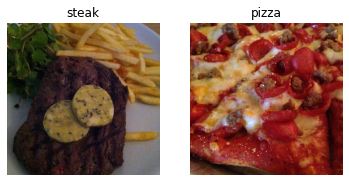

In [21]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2.Verileri önceden işleyin (bir model için hazırlayın)

Bir makine öğrenimi projesi için en önemli adımlardan biri eğitim ve test seti oluşturmaktır.

Bizim durumumuzda, verilerimiz zaten eğitim ve test setlerine bölünmüştür. Buradaki başka bir seçenek de bir doğrulama seti oluşturmak olabilir, ancak şimdilik bunu bırakacağız.

Bir görüntü sınıflandırma projesi için, verilerinizin her sınıf için her birinde alt klasörler bulunan tren ve test dizinlerine ayrılması standarttır.

Başlamak için eğitim ve test dizini yollarını tanımlıyoruz.

In [22]:
# Define training and test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Bir sonraki adımımız, verilerimizi yığınlara dönüştürmektir.

Toplu iş, bir modelin eğitim sırasında baktığı veri kümesinin küçük bir alt kümesidir. Örneğin, bir seferde 10.000 görüntüye bakmak ve kalıpları anlamaya çalışmak yerine, bir model bir seferde yalnızca 32 görüntüye bakabilir.

Bunu birkaç nedenden dolayı yapar:

- 10.000 görüntü (veya daha fazla) işlemcinizin (GPU) belleğine sığmayabilir.
- 10.000 görüntüdeki kalıpları tek bir vuruşta öğrenmeye çalışmak, modelin çok iyi öğrenememesine neden olabilir.

Neden 32?

32'lik bir parti büyüklüğü sağlığınız için iyidir.

Hayır, gerçekten, kullanabileceğiniz birçok farklı parti boyutu vardır, ancak 32'nin birçok farklı kullanım durumunda çok etkili olduğu kanıtlanmıştır ve çoğu zaman birçok veri ön işleme işlevi için varsayılandır.

Verilerimizi toplu işlere dönüştürmek için önce veri kümelerimizin her biri için bir ImageDataGenerator örneği oluşturacağız.

In [23]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

ImageDataGenerator sınıfı, görüntülerimizi yığınlar halinde hazırlamamıza ve modele yüklenirken üzerlerinde dönüşümler gerçekleştirmemize yardımcı olur.

Yeniden ölçeklendirme parametresini fark etmiş olabilirsiniz. Bu, yaptığımız dönüşümlerin bir örneğidir.

Daha önce bir görüntüyü nasıl içe aktardığımızı ve piksel değerlerinin 0 ile 255 arasında olduğunu hatırlıyor musunuz?

1/255 ile birlikte yeniden ölçeklendirme parametresi. "tüm piksel değerlerini 255'e böl" demek gibidir. Bu, tüm görüntünün içe aktarılmasıyla ve piksel değerlerinin normalleştirilmesiyle sonuçlanır (0 ile 1 arasında dönüştürülür).

> 🔑 Not: Veri büyütme gibi daha fazla dönüştürme seçeneği için (bunu daha sonra göreceğiz), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) belgelerine bakın.

Şimdi birkaç ImageDataGenerator örneğimiz var, görüntülerimizi flow_from_directory yöntemini kullanarak ilgili dizinlerinden yükleyebiliriz.

In [24]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Olağanüstü! Görünüşe göre eğitim veri setimizde 2 sınıfa (pizza ve steak) ait 1500 görüntü var ve test veri setimizde 2 sınıfa ait 500 görüntü var.

Buraya bazı şeyler:

- Dizinlerimizin nasıl yapılandırıldığına bağlı olarak, sınıflar, `train_dir` ve `test_dir` içindeki alt dizin adlarından anlaşılır.
- `target_size` parametresi, resimlerimizin giriş boyutunu (yükseklik, genişlik) biçiminde tanımlar.
- `'binary'`nin class_mode değeri, sınıflandırma problem türümüzü tanımlar. İkiden fazla sınıfımız olsaydı, `'categorical'` kullanırdık.
- `batch_size`, her toplu işte kaç tane resim olacağını tanımlar, biz varsayılanla aynı olan 32 tane kullandık.

Train_data nesnesini inceleyerek toplu resimlerimize ve etiketlerimize göz atabiliriz.

In [25]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

Harika, görünüşe göre resimlerimiz ve etiketlerimiz 32'lik gruplar halinde.

Bakalım resimler nasıl görünüyor.

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

Yeniden ölçeklendirme parametremiz nedeniyle, görüntüler artık 0 ile 1 arasında değerlere sahip (224, 224, 3) şekil tensörlerindedir.

Peki ya etiketler?

In [27]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

`class_mode` parametresinin `'binary'` olması nedeniyle etiketlerimiz 0 (pizza) veya 1 (biftek) şeklindedir.

Artık verilerimiz hazır olduğuna göre, modelimiz görüntü tensörleri ve etiketler arasındaki kalıpları bulmaya çalışacak.

### 3.Bir model oluşturun (bir temel ile başlayın)

Varsayılan model mimarinizin ne olması gerektiğini merak ediyor olabilirsiniz.

Ve gerçek şu ki, bu sorunun birçok olası cevabı var.

Bilgisayarlı görme modelleri için basit bir buluşsal yöntem, ImageNet'te en iyi performansı gösteren model mimarisini kullanmaktır (farklı bilgisayarlı görme modellerini kıyaslamak için çeşitli görüntülerden oluşan geniş bir koleksiyon).

Bununla birlikte, başlangıç ​​olarak, geliştirmeye çalıştığınız temel bir sonuç elde etmek için daha küçük bir model oluşturmak iyidir.

> 🔑 Not: Derin öğrenmede daha küçük bir model genellikle son teknolojiden (SOTA) daha az katmana sahip bir modele atıfta bulunur. Örneğin, daha küçük bir model 3-4 katmana sahip olabilirken, ResNet50 gibi son teknoloji bir model 50'den fazla katmana sahip olabilir.

Bizim durumumuzda, CNN açıklayıcı web sitesinde (yukarıdan model_1) bulunabilecek modelin daha küçük bir versiyonunu alalım ve 3 katmanlı bir evrişimli sinir ağı oluşturalım.

In [28]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [29]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

Harika! Kullanıma hazır basit bir evrişimsel sinir ağı mimarimiz var.

Ve aşağıdakilerin tipik yapısını takip eder:
```
# Basic structure of CNN
Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output
```

Conv2D katmanının bazı bileşenlerini tartışalım:

- "2D", girdilerimizin iki boyutlu (yükseklik ve genişlik) olduğu anlamına gelir, 3 renk kanalı olmasına rağmen, kıvrımlar her kanalda ayrı ayrı çalıştırılır.
- **filters**<br> - bunlar, resimlerimiz üzerinde hareket edecek olan "özellik çıkarıcıların" sayısıdır.
- **kernel_size**<br> - filtrelerimizin boyutu, örneğin bir kernel_size (3, 3) (veya sadece 3), her filtrenin 3x3 boyutuna sahip olacağı, yani her seferinde 3x3 piksellik bir alana bakacağı anlamına gelir. Çekirdek ne kadar küçükse, o kadar ince taneli özellikler çıkaracaktır.
- **stride**<br> - bir filtrenin görüntüyü kaplarken üzerinde hareket edeceği piksel sayısı. 1'lik bir adım, filtrenin her piksel boyunca 1'er 1 hareket ettiği anlamına gelir. 2'lik bir adım, bir seferde 2 piksel hareket ettiği anlamına gelir.
- **padding**<br> - bu 'same' veya 'valid' olabilir, 'same' görüntünün dışına sıfırlar ekler, böylece evrişim katmanının sonuçtaki çıktısı girişle aynıdır, burada 'valid' (varsayılan) keser filtrenin sığmadığı fazla piksel (örneğin, 224 piksel genişliğinin 3'lük bir çekirdek boyutuna bölünmesi (224/3 = 74.6)), tek bir pikselin uçtan kesileceği anlamına gelir.

**"feature" nedir?**

Bir özellik, bir görüntünün önemli herhangi bir parçası olarak kabul edilebilir. Örneğin, bizim durumumuzda bir özellik pizzanın dairesel şekli olabilir. Veya bir bifteğin dış tarafındaki pürüzlü kenarlar.

Bu özelliklerin bizim tarafımızdan tanımlanmadığını, bunun yerine modelin görüntü üzerinde farklı filtreler uyguladığı için bunları öğrendiğini belirtmek önemlidir.

Artık modelimiz hazır, derleyelim.

In [30]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

İkili bir sınıflandırma problemi (pizza vs. biftek) üzerinde çalıştığımız için, kullandığımız kayıp fonksiyonu 'binary_crossentropy'dir, eğer çok sınıflıysa, 'categorical_crossentropy' gibi bir şey kullanabiliriz.

Tüm varsayılan ayarlarla Adam, optimize edicimizdir ve değerlendirme metriğimiz doğruluktur.

### 4.Fit a model

Modelimiz derlendi, sığdırma zamanı.

Burada iki yeni parametre fark edeceksiniz:

- **step_per_epoch**<br>bu, bir modelin epoch başına geçeceği batch sayısıdır, bizim durumumuzda, modelimizin tüm batch geçmesini istiyoruz, böylece train_data uzunluğuna eşittir (32'lik gruplar halinde 1500 görüntü = 1500/32 = ~ 47 adım)
- **validation_steps**<br>validation_data parametresi dışında yukarıdakiyle aynı (32 = 500/32 = ~16 adımlık gruplar halinde 500 test görüntüsü)

In [31]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [32]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 192ms/step - loss: 0.8240 - accuracy: 0.7367 - val_loss: 0.3935 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4230 - accuracy: 0.8187 - val_loss: 0.3849 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3228 - accuracy: 0.8687 - val_loss: 0.4140 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.1855 - accuracy: 0.9420 - val_loss: 0.4518 - val_accuracy: 0.8060
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.0690 - accuracy: 0.9813 - val_loss: 0.5036 - val_accuracy: 0.7880


### 5.Modeli değerlendirin

Ah evet! Görünüşe göre modelimiz bir şeyler öğreniyor.

Eğitim eğrilerini kontrol edelim.

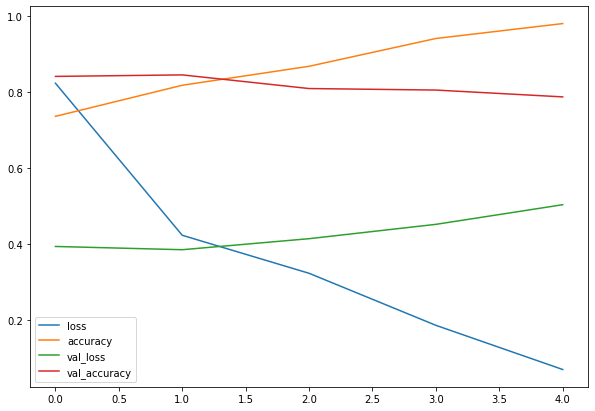

In [33]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Hmm, kayıp eğrilerimize bakılırsa, modelimiz eğitim veri setine fazla uyuyor gibi görünüyor.

> 🔑 Not: Bir modelin doğrulama kaybı artmaya başladığında, büyük olasılıkla eğitim veri kümesine gereğinden fazla uyuyordur. Bu, eğitim veri setindeki kalıpları çok iyi öğrendiği ve böylece görünmeyen verilere genelleme yapma yeteneğinin azalacağı anlamına gelir.

Modelimizin eğitim performansını daha fazla incelemek için doğruluk ve kayıp eğrilerini ayıralım.

In [34]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

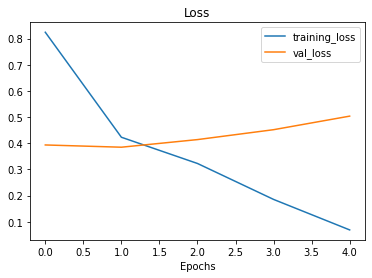

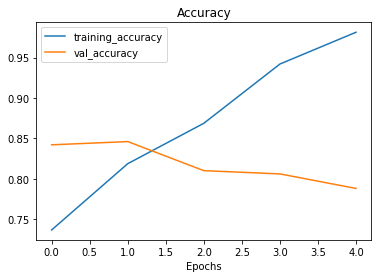

In [35]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

Bu iki eğri için ideal pozisyon birbirini takip etmektir. Herhangi bir şey varsa, doğrulama eğrisi eğitim eğrisinin biraz altında olmalıdır. Eğitim eğrisi ile doğrulama eğrisi arasında büyük bir boşluk varsa, modeliniz muhtemelen fazla uyuyor demektir.

In [36]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6.Model parametrelerini ayarlayın

Bir makine öğrenimi modelinin takılması 3 adımda gerçekleşir:

0. Bir temel oluşturun.
1. Daha büyük bir modele overfitting taban çizgisini geçin.
2. overfitting azaltın.

Şimdiye kadar 0 ve 1 adımlarından geçtik.

Ve modelimize daha fazla uydurmaya çalışabileceğimiz birkaç şey daha var:

- Evrişim katmanlarının sayısını artırın.
- Evrişimli filtrelerin sayısını artırın.
- Düzleştirilmiş katmanımızın çıktısına başka bir yoğun katman ekleyin.

Ama bunun yerine yapacağımız şey, modelimizin eğitim eğrilerini birbiriyle daha iyi hizalamaya odaklanmak, başka bir deyişle 2. adımı atacağız.


**overfitting azaltmak neden önemlidir?**

Bir model, eğitim verileri üzerinde çok iyi ve görünmeyen veriler üzerinde zayıf performans gösterdiğinde, onu gerçek dünyada kullanmak istiyorsak, bize pek faydası olmaz.

Diyelim ki bir pizza ve biftek yemek sınıflandırıcı uygulaması oluşturuyorduk ve modelimiz eğitim verilerimiz üzerinde çok iyi performans gösteriyor ancak kullanıcılar bunu denediğinde kendi yemek görüntülerinde çok iyi sonuçlar alamadılar, bu iyi bir deneyim mi?

Tam olarak değil...

Dolayısıyla, inşa edeceğimiz sonraki birkaç model için bir dizi parametreyi ayarlayacağız ve yol boyunca eğitim eğrilerini inceleyeceğiz.

Yani, 2 model daha inşa edeceğiz:

- Maksimum havuzlamaya sahip bir ConvNet
- Maksimum havuzlama ve veri artırma özelliğine sahip bir ConvNet

İlk model için yapıyı takip edeceğiz:
```
# Basic structure of CNN with max pooling
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```
Hadi inşa edelim. model_4 ile aynı yapıya sahip olacak, ancak her evrişim katmanından sonra bir MaxPool2D() katmanı olacak.

In [38]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

Woah, daha önce görmediğimiz başka bir katman tipimiz var.

Evrişimli katmanlar bir görüntünün özelliklerini öğrenirse, bu özelliklerden en önemlilerini bulmak olarak bir Max Pooling katmanını düşünebilirsiniz. Bunun bir örneğini birazdan göreceğiz.

In [39]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 0.5882 - accuracy: 0.6867 - val_loss: 0.4488 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4599 - accuracy: 0.7947 - val_loss: 0.4528 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4804 - accuracy: 0.7893 - val_loss: 0.4743 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4296 - accuracy: 0.8180 - val_loss: 0.3625 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4043 - accuracy: 0.8293 - val_loss: 0.3525 - val_accuracy: 0.8460


Tamam, maksimum havuzlamalı modelimiz (model_5) eğitim setinde daha kötü ama doğrulama setinde daha iyi performans gösteriyor gibi görünüyor.

Eğitim eğrilerini kontrol etmeden önce mimarisini kontrol edelim.

In [41]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

Her MaxPooling2D katmanındaki çıktı şekliyle burada neler olduğunu fark ettiniz mi?

Her seferinde yarı yarıya düşüyor. Bu MaxPooling2D katmanının her Conv2D katmanının çıktılarını alması ve "Ben sadece en önemli özellikleri istiyorum, geri kalanlardan kurtulun" demesidir.

pool_size parametresi ne kadar büyük olursa, maksimum havuzlama katmanı o kadar fazla özellikleri görüntüden çıkarır. Ancak, çok büyük ve model hiçbir şey öğrenemeyebilir.

Bu havuzlamanın sonuçları, toplam eğitilebilir parametrelerde (model_5'te 8.861 ve model_4'te 477.431) büyük bir azalma olarak görülmektedir.

Kayıp eğrilerini kontrol etme zamanı.

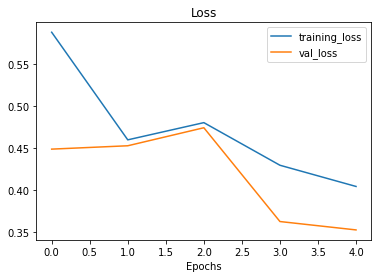

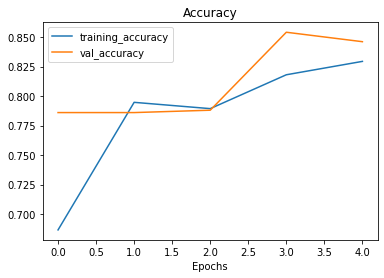

In [42]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Güzel! Antrenman eğrilerinin birbirine çok daha yakınlaştığını görebiliriz. Bununla birlikte, doğrulama kaybımız sona doğru artmaya başlıyor ve potansiyel olarak fazla uydurmaya yol açıyor.

Hile çantamıza girme ve fazla takmayı önlemenin başka bir yöntemini, veri artırmayı denemenin zamanı geldi.

İlk olarak, kodla nasıl yapıldığını göreceğiz, sonra ne yaptığını tartışacağız.

Veri büyütmeyi uygulamak için ImageDataGenerator örneklerimizi yeniden başlatmamız gerekecek.

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 Soru: Veri büyütme nedir?

**Veri büyütme**, eğitim verilerimizi değiştirme, daha fazla çeşitliliğe sahip olmasına ve dolayısıyla modellerimizin daha genelleştirilebilir kalıpları öğrenmesine izin verme sürecidir. Değiştirmek, bir görüntünün dönüşünü ayarlamak, çevirmek, kırpmak veya benzeri bir şey anlamına gelebilir.

Bunu yapmak, bir modelin gerçek dünyada kullanılabileceği veri türünü simüle eder.

Bir pizza ve biftek uygulaması oluşturuyorsak, kullanıcılarımızın çektiği resimlerin tümü eğitim verilerimize benzer kurulumlarda olmayabilir. Veri büyütmeyi kullanmak, fazla uydurmayı önlemenin ve dolayısıyla modelimizi daha genelleştirilebilir hale getirmenin başka bir yolunu sunar.

> 🔑 Not: Veri büyütme genellikle yalnızca eğitim verileri üzerinde gerçekleştirilir. ImageDataGenerator yerleşik veri büyütme parametrelerini kullanarak, görüntülerimiz dizinlerde olduğu gibi bırakılır, ancak modele yüklendiğinde rasgele manipüle edilir.

In [44]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Veri büyütme hakkında konuşmaktan daha iyi, onu görmeye ne dersiniz?

(mottomuzu hatırlıyor musun? görselleştir, görselleştir, görselleştir...)

In [45]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

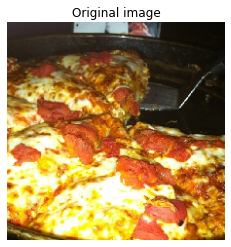

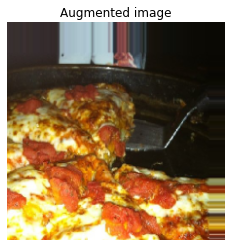

In [52]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Orijinal ve artırılmış görsellerin bir örneğini inceledikten sonra, eğitim görselleri üzerinde bazı örnek dönüşümleri görmeye başlayabilirsiniz.

Bazı artırılmış görüntülerin orijinal görüntünün hafifçe çarpık sürümleri gibi göründüğüne dikkat edin. Bu, modelimizin, gerçek dünya görüntülerini kullanırken genellikle olduğu gibi, mükemmel olmayan görüntülerdeki kalıpları denemek ve öğrenmek zorunda kalacağı anlamına gelir.

> 🤔 Soru: Veri büyütmeyi kullanmalı mıyım? Ve ne kadar arttırmalıyım?

Veri büyütme, bir modelin overfitting olmasını önlemenin bir yoludur. Modeliniz gereğinden fazla overfitting oluyorsa (örneğin, doğrulama kaybı artmaya devam ediyorsa), veri büyütmeyi kullanmayı denemek isteyebilirsiniz.

Ne kadar veri artırılacağına gelince, bunun için belirlenmiş bir uygulama yok. ImageDataGenerator sınıfındaki seçeneklere göz atmak ve kullanım durumunuzdaki bir modelin bazı veri artırmalarından nasıl yararlanabileceğini düşünmek en iyisidir.

Şimdi artırılmış veriye sahibiz, üzerine bir model yerleştirmeye çalışalım ve eğitimi nasıl etkilediğini görelim.

Model_5 ile aynı modeli kullanacağız.

In [53]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 432ms/step - loss: 0.6995 - accuracy: 0.5087 - val_loss: 0.6713 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6912 - accuracy: 0.5440 - val_loss: 0.6571 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6826 - accuracy: 0.5693 - val_loss: 0.6222 - val_accuracy: 0.6740
Epoch 4/5
47/47 [==============================] - 20s 430ms/step - loss: 0.6375 - accuracy: 0.6753 - val_loss: 0.5309 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 20s 434ms/step - loss: 0.5847 - accuracy: 0.7073 - val_loss: 0.4307 - val_accuracy: 0.8520


>🤔 Soru: Modelimiz başlangıçta eğitim setinde neden çok iyi sonuçlar alamadı?

Bunun nedeni, train_data_augmented'i oluşturduğumuzda, shuffle=False kullanarak veri karıştırmayı kapatmış olmamızdır; bu, modelimizin bir seferde yalnızca tek bir tür görüntüden oluşan bir toplu iş gördüğü anlamına gelir.

Örneğin, pizza sınıfı birinci sınıf olduğu için ilk yüklenir. Böylece performansı her iki sınıftan ziyade sadece tek bir sınıfta ölçülür. Doğrulama verileri performansı, karıştırılmış veriler içerdiğinden sürekli olarak iyileşir.

Gösteri amacıyla yalnızca shuffle=False ayarladığımızdan (böylece aynı artırılmış ve büyütülmemiş görüntüyü çizebiliriz), gelecekteki veri oluşturucularda shuffle=True ayarını yaparak bunu düzeltebiliriz.

Ayrıca, artırılmış verilerle eğitim alırken her bir dönemin, artırılmamış verilerle eğitime kıyasla daha uzun sürdüğünü fark etmiş olabilirsiniz (dönem başına ~25sn ve dönem başına ~10sn).

Bunun nedeni, ImageDataGenerator örneğinin, modele yüklenirken verileri büyütmesidir. Bunun yararı, orijinal görüntüleri değiştirmeden bırakmasıdır. Dezavantajı, onları yüklemenin daha uzun sürmesidir.

> 🔑 Not: Veri kümesi manipülasyonunu hızlandırmanın olası bir yöntemi,[ TensorFlow'un paralel okumalarına ve arabelleğe alınmış önceliklendirme](https://www.tensorflow.org/tutorials/images/data_augmentation) seçeneklerine bakmak olabilir.

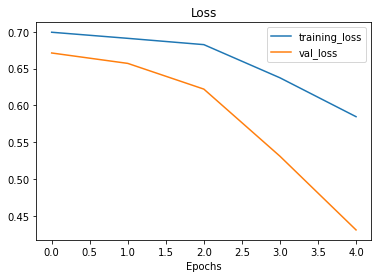

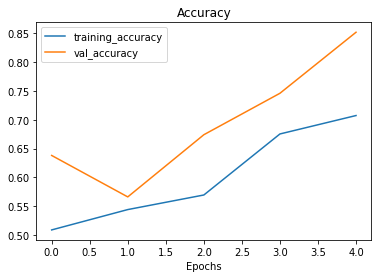

In [54]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

Doğrulama kaybı eğrimiz doğru yönde ilerliyor gibi görünüyor, ancak biraz ürkek (en ideal kayıp eğrisi çok keskin değil, yumuşak bir iniş, ancak tamamen pürüzsüz bir kayıp eğrisi bir peri masalına eşdeğerdir).

Arttırılmış antrenman verilerini karıştırdığımızda ne olacağını görelim.

In [55]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [56]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 438ms/step - loss: 0.6564 - accuracy: 0.6127 - val_loss: 0.5853 - val_accuracy: 0.6460
Epoch 2/5
47/47 [==============================] - 21s 438ms/step - loss: 0.5385 - accuracy: 0.7513 - val_loss: 0.4430 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 21s 438ms/step - loss: 0.4918 - accuracy: 0.7667 - val_loss: 0.3799 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 21s 437ms/step - loss: 0.4707 - accuracy: 0.7853 - val_loss: 0.3408 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 20s 435ms/step - loss: 0.4724 - accuracy: 0.7767 - val_loss: 0.3380 - val_accuracy: 0.8740


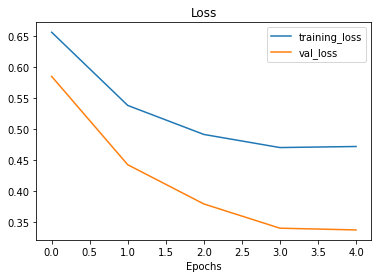

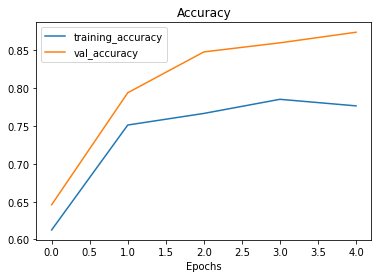

In [57]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

model_7 ile eğitim veri kümesindeki performansın model_6 ile karşılaştırıldığında neredeyse anında nasıl arttığına dikkat edin. Bunun nedeni, eğitim verilerini, flow_from_directory yönteminde shuffle=True parametresini kullanarak modele geçirirken karıştırmış olmamızdır.

Bu, modelin her partide hem pizza hem de biftek görüntülerinin örneklerini görebildiği ve sırayla tek türden değil, her iki görüntüden öğrendiklerini değerlendirebildiği anlamına gelir.

Ayrıca, kayıp eğrilerimiz karıştırılmış verilerle biraz daha pürüzsüz görünüyor (tarih_6 ile geçmiş_7'yi karşılaştırarak).

### 7.Tatmin olana kadar tekrarlayın

Veri kümemizde zaten birkaç model eğittik ve şu ana kadar oldukça iyi performans gösteriyorlar.

Temel çizgimizi çoktan aştığımız için modelimizi geliştirmeye devam etmek için deneyebileceğimiz birkaç şey var:

- Model katmanlarının sayısını artırın (örneğin, daha fazla evrişim katmanı ekleyin).
- Her evrişim katmanındaki filtre sayısını artırın (örn. 10'dan 32'ye, 64'e veya 128'e, bu sayılar da sabit değildir, genellikle deneme yanılma yoluyla bulunurlar).
- Daha uzun süre antrenman yapın (daha fazla dönem).
- İdeal bir öğrenme oranı (learning_rate) bulma.
- Daha fazla veri alın (modele öğrenmesi için daha fazla fırsat verin).
- Başka bir görüntü modelinin öğrendiklerinden yararlanmak için aktarım öğrenimini kullanın ve bunu kendi kullanım durumumuza göre ayarlayın.

Model geliştirme sırasında bu ayarların her birinin (son ikisi hariç) ayarlanması genellikle hiperparametre ayarı olarak adlandırılır.

Hiperparametre ayarını, en sevdiğiniz yemeği pişirmek için fırınınızdaki ayarları yapmaya benzetebilirsiniz. Fırınınız sizin için pişirmenin çoğunu yapsa da, kadranları ayarlayarak buna yardımcı olabilirsiniz.

Başladığımız yere geri dönelim ve orijinal modelimizi deneyelim:

In [58]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6396 - accuracy: 0.6213 - val_loss: 0.4527 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 21s 445ms/step - loss: 0.5068 - accuracy: 0.7607 - val_loss: 0.3526 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 21s 444ms/step - loss: 0.5037 - accuracy: 0.7620 - val_loss: 0.4007 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4948 - accuracy: 0.7713 - val_loss: 0.3786 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 21s 443ms/step - loss: 0.4817 - accuracy: 0.7740 - val_loss: 0.3442 - val_accuracy: 0.8700


> 🔑 Not: Model_8'i oluşturmak için model_1 ile karşılaştırıldığında biraz farklı kodlar kullandığımızı fark etmiş olabilirsiniz. Bunun nedeni, daha önce yaptığımız içe aktarmalar, örneğin tensorflow.keras.layers'dan içe aktarma Conv2D, yazmamız gereken kod miktarını azaltır. Kodlar farklı olsa da mimariler aynı.

In [59]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [60]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

Şimdi TinyVGG modelimizin performansını kontrol edelim.

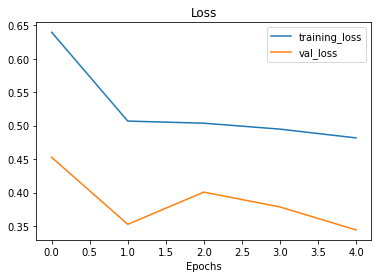

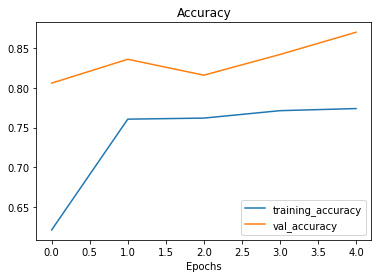

In [61]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

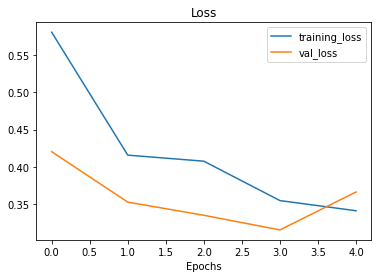

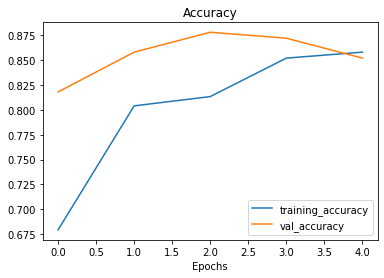

In [62]:
# How does this training curve look compared to the one above?
plot_loss_curves(history_1)

Hmm, eğitim eğrilerimiz iyi görünüyor, ancak modelimizin eğitim ve test setlerindeki performansı önceki modele göre pek gelişmedi.

Eğitim eğrilerine bir kez daha baktığımızda, biraz daha uzun süre (daha fazla dönem) eğitirsek modelimizin performansı artabilir gibi görünüyor.

Belki de bu denemekten hoşlandığın bir şeydir?

### Eğitimli modelimiz ile tahmin yapmak

Onunla tahmin yapamıyorsanız, eğitimli bir model ne işe yarar?

Gerçekten test etmek için kendi resimlerimizden birkaçını yükleyeceğiz ve modelin nasıl gittiğini göreceğiz.

Öncelikle kendimize sınıf isimlerini hatırlatalım ve üzerinde test edeceğimiz görsele bakalım.

In [63]:
# Classes we're working with
print(class_names)

['.DS_Store' 'pizza' 'steak']


--2021-06-19 09:28:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2021-06-19 09:28:35 (28.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



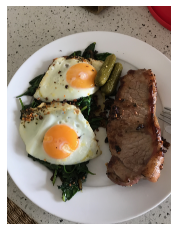

In [64]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [65]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

Modelimiz şekillerin (224, 224, 3) görüntülerini aldığından, kendi modelimiz ile kullanmak için özel imajımızı yeniden şekillendirmemiz gerekiyor.

Bunu yapmak için, tf.io.read_file (dosyaları okumak için) ve tf.image (imajımızı yeniden boyutlandırmak ve bir tensöre dönüştürmek için) kullanarak imajımızı içe aktarabilir ve kodunu çözebiliriz.

> 🔑 Not: Modelinizin, örneğin kendi özel resimleriniz gibi görünmeyen verilerle ilgili tahminlerde bulunabilmesi için, özel görüntünün, modelinizin eğitildiği şekilde olması gerekir. Daha genel bir ifadeyle, özel veriler üzerinde tahminlerde bulunmak için modelinizin eğitildiği formda olması gerekir.

In [66]:
# Create a function to import an image and resize it to be able to be used with our modle
def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

Şimdi özel imajımızı yüklemek için bir fonksiyonumuz var, onu yükleyelim.

In [67]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Harika, imajımız tensör formatında, modelimiz ile deneme zamanı!

In [68]:
# Make a prediction on our custom image (spoiler: this won't work)
model_8.predict(steak)

ValueError: ignored

Bir sorun daha var...

İmgemiz, modelimizin eğitildiği görüntülerle aynı şekilde olmasına rağmen, hala bir boyutu kaçırıyoruz.

Modelimizin gruplar halinde nasıl eğitildiğini hatırlıyor musunuz?

batch boyutu ilk boyut olur.

Yani gerçekte, modelimiz (batch_size, 224, 224, 3) şeklindeki veriler üzerinde eğitildi.

Bunu, `tf.expand_dims` kullanarak özel görüntü tensörümüze fazladan ekleyerek düzeltebiliriz.

In [69]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

Özel görselimizin toplu iş boyutu 1'dir! Ona göre bir tahmin yapalım.

In [70]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

array([[0.8548326]], dtype=float32)

Ahh, tahminler tahmin olasılık şeklinde çıkıyor. Başka bir deyişle, bu, görüntünün bir sınıf veya başka bir sınıf olma olasılığının ne kadar olduğu anlamına gelir.

İkili bir sınıflandırma problemi ile çalıştığımız için, tahmin olasılığı modele göre 0,5'in üzerindeyse, tahmin büyük olasılıkla pozitif sınıf olacaktır (sınıf 1).

Ve tahmin olasılığı 0,5'in altındaysa, modele göre, tahmin edilen sınıf büyük olasılıkla negatif sınıftır (sınıf 0).

> 🔑 Not: 0,5 kesme beğeninize göre ayarlanabilir. Örneğin, pozitif sınıf için limiti 0,8 ve üzeri ve negatif sınıf için 0,2 olarak ayarlayabilirsiniz. Ancak, bunu yapmak neredeyse her zaman modelinizin performans ölçümlerini değiştirecektir, bu nedenle doğru yönde değiştiklerinden emin olun.

Ama pizza 🍕 ve biftek 🥩 ile çalışırken pozitif ve negatif sınıf demek pek mantıklı gelmiyor...

Öyleyse, tahminleri sınıf adlarına dönüştürmek için küçük bir fonksiyon yazalım ve ardından hedef görüntüyü çizelim.

In [73]:
# Remind ourselves of our class names
class_names = class_names[1:]

In [74]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [75]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [76]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

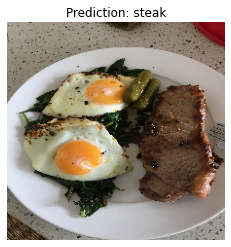

In [77]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

Güzel! Modelimiz tahmini doğru yaptı.

Yemekle çalışmanın tek dezavantajı bu beni acıktırıyor.

Bir resim daha deneyelim.

--2021-06-19 09:35:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.1s    

2021-06-19 09:35:19 (23.7 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



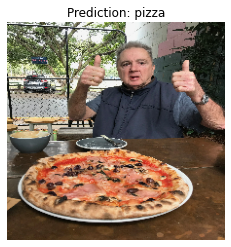

In [78]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Çok Sınıflı Sınıflandırma

Bu defter aracılığıyla CNN Açıklayıcı web sitesindeki TinyVGG mimarisine birçok kez atıfta bulunduk, ancak CNN Açıklayıcı web sitesi 10 farklı görüntü sınıfıyla çalışıyor, şu anki modelimiz yalnızca iki sınıfla (pizza ve biftek) çalışıyor.

> 🛠 Alıştırma: Aşağı kaydırmadan önce, aynı türden görüntülerden oluşan 10 sınıfla çalışmak için modelimizi nasıl değiştirebileceğimizi düşünüyorsunuz? Verilerin iki sınıf problemimizle aynı tarzda olduğunu varsayalım.

Pizza 🍕 ve biftek 🥩 sınıflandırıcımızı oluşturmak için daha önce attığımız adımları hatırlıyor musunuz?

O aşamaları bir kez daha gözden geçirmeye ne dersiniz, ama bu sefer 10 farklı yiyecek türüyle çalışacağız.

1. Verilerle bütünleşin (görselleştirin, görselleştirin, görselleştirin...)
2. Verileri önceden işleyin (bir model için hazırlayın)
3. Bir model oluşturun (bir temel ile başlayın)
4. Modeli Sığdır
5. Modeli değerlendirin
6. Farklı parametreleri ayarlayın ve modeli iyileştirin (temel çizginizi geçmeye çalışın)
7. Memnun kalana kadar tekrarlayın

<img src="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png" />

### 1.Verileri içe aktarın ve verilerle bir olun

Yine, Food101 veri kümesinin bir alt kümesine sahibiz. Pizza ve biftek resimlerine ek olarak, sekiz sınıf daha çıkardık.

In [79]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-06-19 09:37:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   226MB/s    in 2.2s    

2021-06-19 09:37:22 (226 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Şimdi 10_food_classes dosyasındaki tüm farklı dizinleri ve alt dizinleri kontrol edelim.

In [80]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

İyi görünüyor!

Şimdi eğitim ve test dizini yollarını ayarlayacağız.

In [81]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

Ve alt dizinlerden sınıf adlarını alın.

In [82]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Eğitim setinden bir görseli görselleştirmeye ne dersiniz?

Image shape: (384, 512, 3)


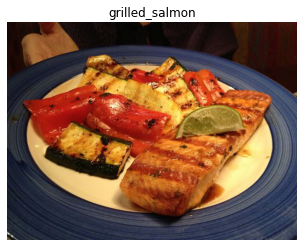

In [84]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

### 2.Verileri önceden işleyin (bir model için hazırlayın)

Birkaç resimden geçtikten sonra (en az 10-100 farklı örneği görselleştirmek iyidir), veri dizinlerimiz doğru şekilde ayarlanmış gibi görünüyor.

Verileri önceden işleme zamanı.

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


İkili sınıflandırmada olduğu gibi, yaratıcı görüntü oluşturucularımız var. Bu seferki ana değişiklik, class_mode parametresini 'categorical' olarak değiştirmemizdir çünkü 10 sınıf yiyecek görüntüsü ile uğraşıyoruz.

Görüntüleri yeniden ölçeklendirmek, toplu iş boyutunu ve hedef görüntü boyutunu oluşturmak gibi diğer her şey aynı kalır.

> 🤔 Soru: Resmin boyutu neden 224x224? Bu aslında istediğimiz herhangi bir boyut olabilir, ancak 224x224, görüntülerin ön işlemesi için çok yaygın bir boyuttur. Sorununuza bağlı olarak daha büyük veya daha küçük resimler kullanmak isteyebilirsiniz.

### 3.Bir model oluşturun (bir temel ile başlayın)

İkili sınıflandırma problemi için kullandığımız aynı modeli (TinyVGG) çok sınıflı sınıflandırma problemimiz için birkaç küçük ince ayar ile kullanabiliriz.

Yani:

- Kullanılacak çıktı katmanını değiştirmek, 10 çıktı nöronuna sahiptir (sahip olduğumuz sınıf sayısıyla aynı sayı).
- Çıktı katmanını 'sigmoid' aktivasyonu yerine 'softmax' aktivasyonunu kullanacak şekilde değiştirme.
- Kayıp işlevinin 'binary_crossentropy' yerine 'categorical_crossentropy' olarak değiştirilmesi.

In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4.Fit a model

Şimdi birden fazla sınıfla çalışmaya uygun bir modelimiz var, onu verilerimize uyduralım.

In [87]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 189ms/step - loss: 2.1938 - accuracy: 0.1912 - val_loss: 1.9996 - val_accuracy: 0.2796
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.9007 - accuracy: 0.3340 - val_loss: 1.9219 - val_accuracy: 0.3196
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.5115 - accuracy: 0.4901 - val_loss: 2.2485 - val_accuracy: 0.2556
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 0.8902 - accuracy: 0.7133 - val_loss: 2.5260 - val_accuracy: 0.2812
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.3402 - accuracy: 0.8975 - val_loss: 4.0330 - val_accuracy: 0.2504


Neden her dönemin yalnızca iki görüntü sınıfıyla çalışırken olduğundan daha uzun sürdüğünü düşünüyorsunuz?

Çünkü artık eskisinden daha fazla görüntüyle uğraşıyoruz. 750 eğitim görüntüsü ve her biri toplam 10.000 görüntü olan 250 doğrulama görüntüsü içeren 10 sınıfımız var. İki sınıfımız olduğu zaman, toplam 2000 olmak üzere 1500 eğitim görselimiz ve 500 doğrulama görselimiz vardı.

Buradaki sezgisel akıl yürütme, ne kadar fazla veriye sahip olursanız, bir modelin kalıpları bulması o kadar uzun sürer.

### 5.Modeli değerlendirin

Woohoo! Az önce bir modeli 10 farklı yiyecek görüntüsü sınıfında eğittik, bakalım nasılmış.

In [88]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 4.0330 - accuracy: 0.2504


[4.033021450042725, 0.25040000677108765]

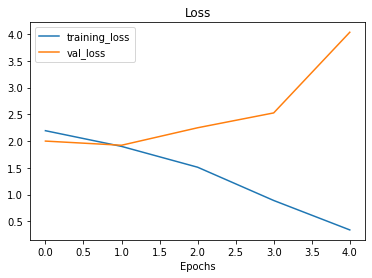

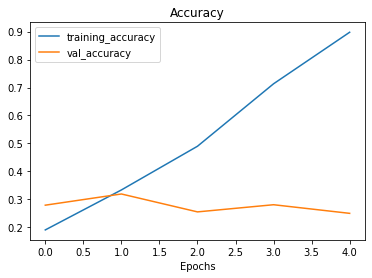

In [89]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

Woah, eğitim ve doğrulama kaybı eğrileri arasındaki boşluk bu kadar.

Bu bize ne anlatıyor?

Görünüşe göre modelimiz eğitim setine oldukça overfitting olmuş. Başka bir deyişle, eğitim verilerinde harika sonuçlar alıyor ancak görünmeyen verilere genelleme yapamıyor ve test verilerinde düşük performans gösteriyor.

### 6.Model parametrelerini ayarlayın

Eğitim verileri üzerindeki performansı nedeniyle, modelimizin bir şeyler öğrendiği açıktır. Bununla birlikte, eğitim verileri üzerinde iyi performans sergilemek, sınıfta iyi gidiyor ancak becerilerinizi gerçek hayatta kullanamamak gibidir.

İdeal olarak, modelimizin eğitim verilerinde olduğu gibi test verilerinde de performans göstermesini isteriz.

Bu yüzden sonraki adımlarımız, modelimizin fazla takılmasını önlemek olacaktır. Aşırı takmayı önlemenin birkaç yolu şunları içerir:

- **Daha fazla veri elde edin**<br> Daha fazla veriye sahip olmak, modele yeni örneklere daha genelleştirilebilecek kalıpları, kalıpları öğrenmek için daha fazla fırsat verir.
- **Modeli basitleştirin**<br> Mevcut model zaten eğitim verilerine fazla uyuyorsa, bir model için çok karmaşık olabilir. Bu, veri kalıplarını çok iyi öğrendiği ve görünmeyen verilere iyi genelleme yapamadığı anlamına gelir. Bir modeli basitleştirmenin bir yolu, kullandığı katman sayısını azaltmak veya her katmandaki gizli birimlerin sayısını azaltmaktır.
- **Veri büyütmeyi kullan**<br> Veri büyütme, eğitim verilerini bir şekilde manipüle eder, böylece verilere yapay olarak daha fazla çeşitlilik eklediğinden modelin öğrenmesi daha zordur. Bir model artırılmış verilerdeki kalıpları öğrenebiliyorsa, model görünmeyen verilere daha iyi genelleme yapabilir.
- **Transfer öğrenimini kullanın**<br> Transfer öğrenimi, bir modelin kendi göreviniz için temel olarak kullanmayı öğrendiği kalıplardan (önceden eğitilmiş ağırlıklar olarak da adlandırılır) yararlanmayı içerir. Bizim durumumuzda, çok çeşitli görüntüler üzerinde önceden eğitilmiş bir bilgisayarlı görü modelini kullanabilir ve ardından yiyecek görüntüleri için daha özel olması için biraz ince ayar yapabilirdik.

> 🔑 Not: Fazla takmayı önlemeye aynı zamanda düzenleme denir.

Halihazırda mevcut bir veri kümeniz varsa, muhtemelen ilk önce yukarıdaki son üç seçenekten birini veya bunların bir kombinasyonunu denemeniz olasıdır.

Daha fazla veri toplamak, elle daha fazla yiyecek görüntüsü almamızı gerektireceğinden, yapabileceklerimizi doğrudan not defterinden deneyelim.

Önce modelimizi sadeleştirmeye ne dersiniz?

Bunu yapmak için, toplam evrişim katmanı sayısını dörtten ikiye alarak iki kat evrişim katmanını kaldıracağız.

In [90]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 179ms/step - loss: 2.1094 - accuracy: 0.2635 - val_loss: 1.9722 - val_accuracy: 0.2964
Epoch 2/5
235/235 [==============================] - 42s 177ms/step - loss: 1.7969 - accuracy: 0.3879 - val_loss: 1.9026 - val_accuracy: 0.3552
Epoch 3/5
235/235 [==============================] - 41s 175ms/step - loss: 1.4848 - accuracy: 0.5092 - val_loss: 1.9570 - val_accuracy: 0.3364
Epoch 4/5
235/235 [==============================] - 41s 175ms/step - loss: 1.0201 - accuracy: 0.6757 - val_loss: 2.1800 - val_accuracy: 0.3032
Epoch 5/5
235/235 [==============================] - 41s 174ms/step - loss: 0.5532 - accuracy: 0.8351 - val_loss: 2.7915 - val_accuracy: 0.2868


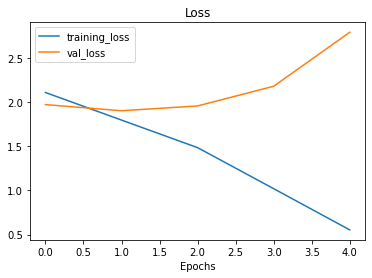

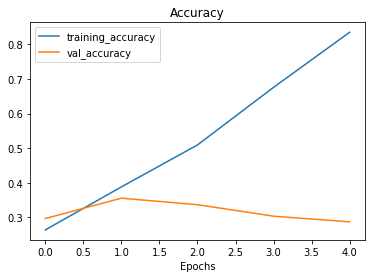

In [91]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

Hmm... basitleştirilmiş bir modelle bile, modelimiz hala eğitim verilerine önemli ölçüde uyuyor gibi görünüyor.

Başka ne deneyebiliriz?

Veri artırmaya ne dersiniz?

Veri büyütme, modelin eğitim verileri üzerinde öğrenmesini zorlaştırır ve bunun sonucunda öğrendiği kalıpları görünmeyen verilere daha genelleştirilebilir hale getirmeyi umar.

Artırılmış veri oluşturmak için, yeni bir ImageDataGenerator örneğini yeniden oluşturacağız, bu sefer resimlerimizi işlemek için rotasyon_aralığı ve yatay_flip gibi bazı parametreler ekleyeceğiz.

In [92]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Şimdi artırılmış veriye sahibiz, eskisi gibi aynı modelle (model_10) nasıl çalıştığını görelim.

Modeli sıfırdan yeniden yazmak yerine, mevcut bir modeli alıp aynı biçimde yeniden oluşturabilen klon_model adlı TensorFlow'daki kullanışlı bir işlevi kullanarak onu klonlayabiliriz.

Klonlanmış sürüm, orijinal modelin öğrendiği ağırlıkların (kalıpların) hiçbirini içermeyecektir. Yani onu eğittiğimizde, sıfırdan bir modeli eğitmek gibi olacak.

> 🔑 Not: Derin öğrenme ve genel olarak makine öğrenimindeki temel uygulamalardan biri seri deneyci olmaktır. Burada yaptığımız şey bu. Bir şey denemek, işe yarayıp yaramadığını görmek, sonra başka bir şey denemek. İyi bir deneme kurulumu, değiştirdiğiniz şeyleri de takip eder, örneğin, bu nedenle öncekiyle aynı modeli ancak farklı verilerle kullanıyoruz. Model aynı kalır, ancak veriler değişir, bu, artırılmış eğitim verilerinin performans üzerinde herhangi bir etkisi olup olmadığını bize bildirir.

In [93]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 100s 423ms/step - loss: 2.2903 - accuracy: 0.1507 - val_loss: 2.1557 - val_accuracy: 0.2308
Epoch 2/5
235/235 [==============================] - 99s 423ms/step - loss: 2.0895 - accuracy: 0.2641 - val_loss: 1.9355 - val_accuracy: 0.3208
Epoch 3/5
235/235 [==============================] - 99s 420ms/step - loss: 2.0403 - accuracy: 0.2864 - val_loss: 1.8629 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 99s 420ms/step - loss: 1.9896 - accuracy: 0.3067 - val_loss: 1.9041 - val_accuracy: 0.3396
Epoch 5/5
235/235 [==============================] - 98s 418ms/step - loss: 1.9622 - accuracy: 0.3195 - val_loss: 1.8075 - val_accuracy: 0.3800


Her çağın bir önceki modelden daha uzun sürdüğünü görebilirsiniz. Bunun nedeni, verilerimizin GPU'ya yüklendikçe CPU'da anında genişletilmesi ve her dönem arasındaki sürenin artmasıdır.

Modelimizin eğitim eğrileri nasıl görünüyor?

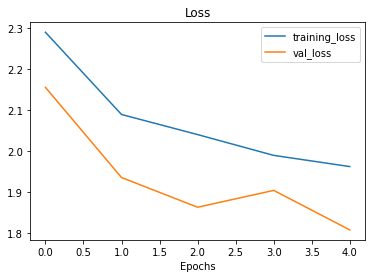

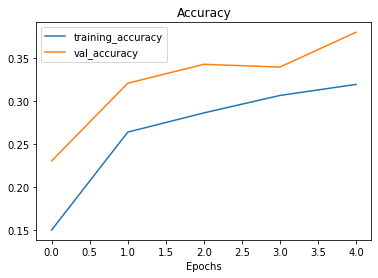

In [94]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

Vay! Bu çok daha iyi görünüyor, kayıp eğrileri birbirine çok daha yakın. Modelimiz artırılmış eğitim setinde iyi performans göstermese de doğrulama veri setinde çok daha iyi performans gösterdi.

Hatta eğitimini daha uzun süre (daha fazla dönem) sürdürürsek, değerlendirme metrikleri gelişmeye devam edebilir gibi görünüyor.

### 7.Memnun kalana kadar tekrarlayın

Burada devam edebilirdik. Modelimizin mimarisini yeniden yapılandırmak, daha fazla katman eklemek, denemek, öğrenme oranını ayarlamak, denemek, farklı veri büyütme yöntemlerini denemek, daha uzun süre eğitim. Ancak, hayal edebileceğiniz gibi, bu oldukça uzun zaman alabilir.

İyi ki henüz denemediğimiz bir numara var ve o da transfer öğrenme.

Bununla birlikte, kendi modellerimizi sıfırdan tasarlamak yerine başka bir modelin öğrendiği kalıplardan kendi görevimiz için nasıl yararlandığımızı göreceğiniz bir sonraki not defterine kaydedeceğiz.

Bu arada eğitimli çok sınıflı modelimiz ile bir tahminde bulunalım.

### Eğitimli modelimiz ile tahmin yapmak

Onunla tahmin yapamayacaksanız bir model ne işe yarar?

Önce kendimize çok sınıflı modelimizin üzerinde eğitim aldığı sınıfları hatırlatalım ve sonra çalışmak için kendi özel görüntülerinden bazılarını indireceğiz.

In [95]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Güzel, şimdi özel resimlerimizden bazılarını alalım.

Google Colab kullanıyorsanız, dosyalar sekmesi aracılığıyla kendi resimlerinizden bazılarını da yükleyebilirsiniz.

In [96]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Tamam, deneyecek bazı özel resimlerimiz var, hadi resimlerden birinde model_11 ile bir tahmin yapmak için pred_and_plot işlevini kullanalım ve onu çizelim.

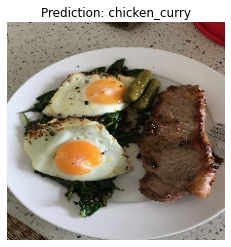

In [97]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

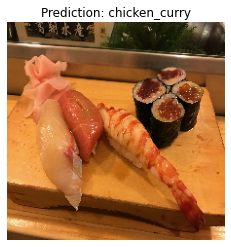

In [98]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

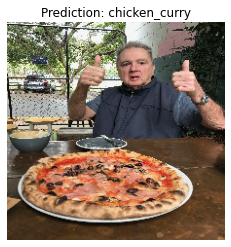

In [99]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

Pred_and_plot işlevimizle ilgili olabileceğini düşünüyorum.

Fonksiyonu kullanmadan bir tahmin yapalım ve nerede yanlış gidebileceğini görelim.

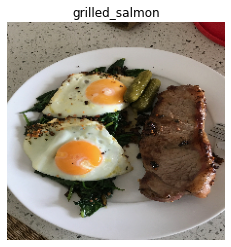

In [100]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

Çok daha iyi! pred_and_plot işlevimizde bir şeyler olmalı.

Ve sanırım ne olduğunu biliyorum.

pred_and_plot işlevi, mevcut modelimizin çok sınıflı bir sınıflandırma modeli olduğu ikili sınıflandırma modelleriyle kullanılmak üzere tasarlanmıştır.

Ana fark, tahmin fonksiyonunun çıktısında yatmaktadır.

In [101]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.04507433, 0.0477357 , 0.0266358 , 0.33110633, 0.07681688,
        0.06678607, 0.01469774, 0.062341  , 0.21320775, 0.11559847]],
      dtype=float32)

Modelimiz bir 'softmax' aktivasyon fonksiyonuna ve 10 çıkış nöronuna sahip olduğundan, modelimizde her sınıf için bir tahmin olasılığı verir.

En yüksek olasılığa sahip sınıf, modelin görüntünün içerdiğine inandığı sınıftır.

argmax kullanarak maksimum değer indeksini bulabilir ve ardından bunu, tahmin edilen sınıfın çıktısını almak için sınıf_adı listemizi indekslemek için kullanabiliriz.

In [102]:
# Find the predicted class name
class_names[pred.argmax()]

'grilled_salmon'

Bunu bilerek, pred_and_plot işlevimizi ikili sınıfların yanı sıra birden çok sınıfla çalışacak şekilde yeniden ayarlayabiliriz.

In [103]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Deneyelim. Doğru yaptıysak, farklı görüntüler kullanmak farklı çıktılara yol açmalıdır (her seferinde Chicken_curry yerine).

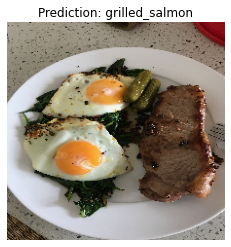

In [104]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

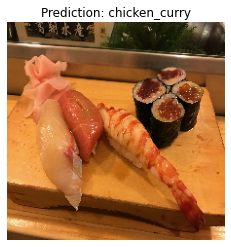

In [105]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

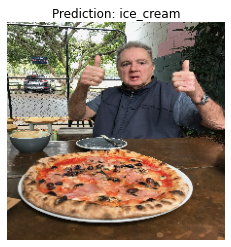

In [106]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

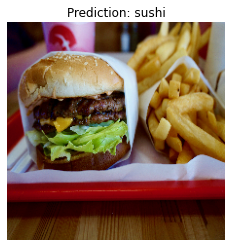

In [107]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

Modelimizin tahminleri çok iyi değil, bunun nedeni test veri setinde yalnızca ~%35 doğrulukta performans göstermesidir.

## Modelimizi kaydetme ve yükleme

Bir modeli eğittikten sonra, muhtemelen onu kaydedip başka bir yere yüklemek istersiniz.

Bunun için save ve load_model fonksiyonlarını kullanabiliriz.

In [108]:
# Save a model
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [109]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 1.8075 - accuracy: 0.3800


[1.8075498342514038, 0.3799999952316284]

In [110]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.8075 - accuracy: 0.3800


[1.8075495958328247, 0.3799999952316284]

---

## 🛠 Egzersizler

1. 20 dakikanızı [CNN açıklayıcı web sitesini](https://poloclub.github.io/cnn-explainer/) okuyarak ve etkileşim kurarak geçirin.
  - Anahtar terimler nelerdir? Örneğin. evrişimi kendi kelimelerinizle açıklayın, kendi kelimelerinizle birleştirin

- CNN açıklayıcı web sitesindeki "hiperparametreleri anlama" bölümü ile 10 dakika oynayın.
- Çekirdek boyutu nedir?
  - Adım nedir?
  - Bunların her birini TensorFlow kodunda nasıl ayarlayabilirsiniz?
- İki farklı şeyin 10 fotoğrafını çekin ve burada oluşturduğumuz teknikleri kullanarak kendi CNN görüntü sınıflandırıcınızı oluşturun.
- 10 sınıf veri kümenizde basit bir evrişimli sinir ağı modeli için ideal bir öğrenme oranı bulun.